In [1]:
import sys, os
sys.path.append('C:\\Users\Quentin\\Documents\\ALMA_CHILI\\gaia-shock\\src')

## directory
rootdir = r'C:\Users\Quentin\Documents\ALMA_CHILI'
wdir    = r'%s\products'%(rootdir)
#notedir = r'%s\gaia-shock\notebooks_Quentin'%(rootdir)

os.chdir(wdir)  # to change the current directory

import gaia_utils_quentin as gu

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [2]:
clustername = "M67"
RADIUS       = 0.5
errtol       = 1
dump_to_file = False

In [3]:
## Read the data and do the conversion

source = gu.source(clustername)
source.query(RADIUS, errtol, dump_to_file)
#source.read_votable(voname)
source.convert_filter_data(without_mag=True)

SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),                                      CIRCLE('ICRS',132.8250000000,11.8000000000,0.5000000000)) = 1                                      AND abs(pmra_error/pmra)<  1.000000  AND abs(pmdec_error/pmdec)< 1.0000000000                                     AND abs(parallax_error/parallax)< 1.0000000000;
Query finished.
## Query for M67 done
## Total stars: 3660

(3132, 8)
## Conversion done...
## Stars selected: 3132



(3132, 8)
## Conversion done...
## Stars selected: 3132


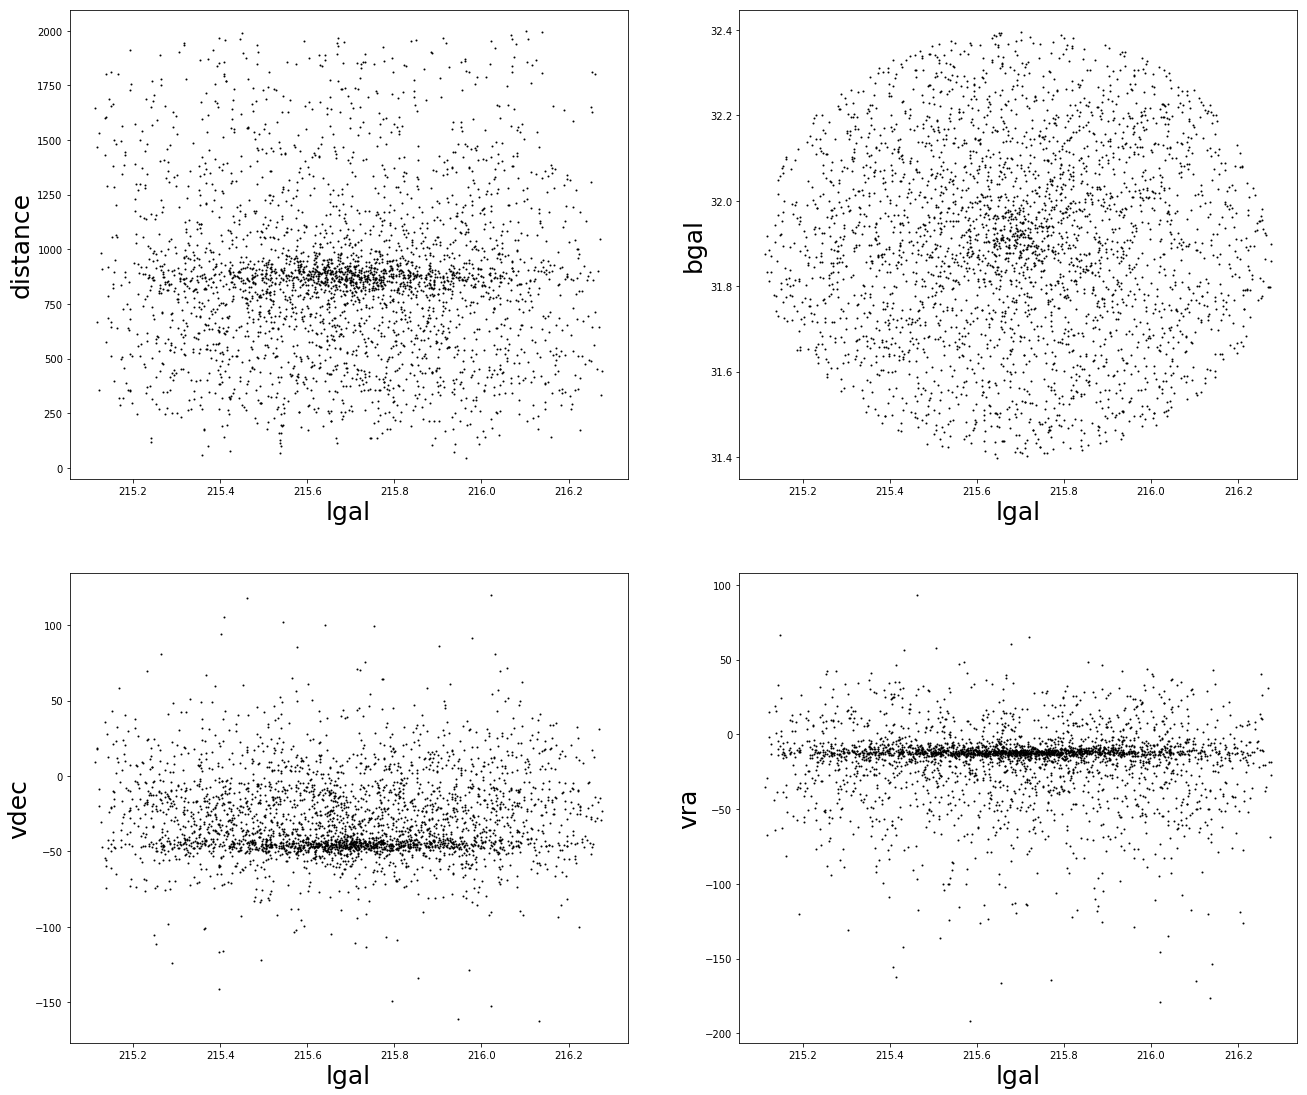

()

In [4]:
source.convert_filter_data(without_mag=True)
source.plot_information(size=1)

In [6]:
source.convert_to_cartesian()